### Develop LSTM Models For Univariate Time Series Forecasting


In [118]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [119]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_steps):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_steps
        if end_ix > len(timeseries_data) - 1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [120]:
timeseries_data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115]
n_steps = 4
X, y = prepare_data(timeseries_data, n_steps)

In [121]:
X, y

(array([[112, 118, 132, 129],
        [118, 132, 129, 121],
        [132, 129, 121, 135],
        [129, 121, 135, 148],
        [121, 135, 148, 148],
        [135, 148, 148, 136],
        [148, 148, 136, 119],
        [148, 136, 119, 104],
        [136, 119, 104, 118]]),
 array([121, 135, 148, 148, 136, 119, 104, 118, 115]))

In [122]:
X.shape,y.shape

((9, 4), (9,))

In [123]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model


In [124]:
model = Sequential()
model.add(
    LSTM(
        50, activation="relu", return_sequences=True, input_shape=(n_steps, n_features)
    )
)
model.add(LSTM(50, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 15662.8750
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 15412.8926
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 15139.6133
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 14827.7275
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 14525.5674
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 14168.8789
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 13750.5518
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 13306.4912
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 12831.9375
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 12269.6152
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 11669.1455
Epoch 12/300
1/1 [==============================] - 0s 6ms/step - loss: 11010.6123
Epoch 13/300
1

### Predicting For the next 10 data

In [125]:
x_input = np.array(timeseries_data[len(timeseries_data) - n_steps :])
temp_input = list(x_input)
lst_output = []
i = 0
while i < 10:
    if len(temp_input) > 4:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1


print(lst_output)

[127.608635, 115.27745, 122.062096, 125.054016, 134.69917, 125.607, 136.35268, 138.70206, 148.57092, 137.92824]


### Visualizaing The Output


In [126]:
import matplotlib.pyplot as plt

In [127]:
day_new = np.arange(1, 14)
day_pred = np.arange(14, 24)

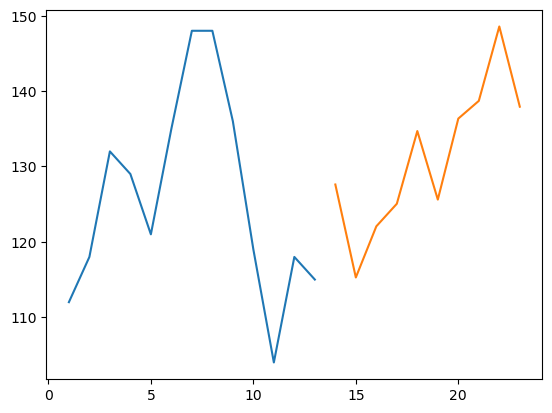

In [128]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)

### Python Code

In [129]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

def prepare_data(timeseries_data, n_steps):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_steps
        if end_ix > len(timeseries_data) - 1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def forecast_time_series(timeseries_data, n_steps, n_forecast):
    n_features = 1
    X, y = prepare_data(timeseries_data, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    model = Sequential()
    model.add(
        LSTM(
            50, activation="relu", return_sequences=True, input_shape=(n_steps, n_features)
        )
    )
    model.add(LSTM(50, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    model.fit(X, y, epochs=300, verbose=0)

    x_input = np.array(timeseries_data[len(timeseries_data) - n_steps :])
    temp_input = list(x_input)
    lst_output = []

    for i in range(n_forecast):
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            temp_input = temp_input[1:]
            lst_output.append(yhat[0][0])
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])

    return lst_output

timeseries_data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115]
n_steps = 4
n_forecast = 10
forecasted_data = forecast_time_series(timeseries_data, n_steps, n_forecast)
print("Forecasted data:", forecasted_data)

Forecasted data: [126.34268, 125.54211, 128.85773, 134.1799, 142.46788, 144.92729, 145.04619, 152.89594, 162.46848, 164.10892]
